# Using Random-Forest, LDA algorithm to predict Color & Quality of Wine by analyzing chemical composition of the Wine

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pylab as plt
from random import sample

#importing libraries 

url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red=requests.get(url).content
red=pd.read_csv(io.StringIO(red.decode('utf-8')),sep=';')
red = red[red['quality'] > 5]

#Loading data for Red wine & ignoring Quality of Wine below 5

url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white=requests.get(url).content
white=pd.read_csv(io.StringIO(white.decode('utf-8')),sep=';')
white = white[white['quality'] > 5]

#Loading data for White wine & ignoring Quality of Wine below 5

red['Color']= 0 # for Red
white['Color'] =1 # for White

#Classifing Red =0 & White =1

merged_data =[red,white]
result =pd.concat(merged_data)

#merging data to create a single dump

result.loc[result['quality'] == 6, 'quality'] = 1
result.loc[result['quality'] == 7, 'quality'] = 2
result.loc[result['quality'] == 8, 'quality'] = 3
result.loc[result['quality'] == 9, 'quality'] = 4

#Re-assigning Quality of Wine to 1-4 for better clarity

n = np.random.randint(2000,3000, size=1)
result_random = result.sample(n=n)

#Creating a random dataset of rows between 2000-3000

#Detailing steps in above code block <br>
Importing Libraries<br>
Reading files Red & White loading in pandas Dataframe as csv, ignoring 'Quality<5' as very few rows had lower quality<br>
Getting 2 files ready for merging<br>
Re-Assigning Quality to 1-4 clusters, randomizing merged data to increase complexity<br>
    

# Data Exploration and Visualization to better understand the different interacting parameters

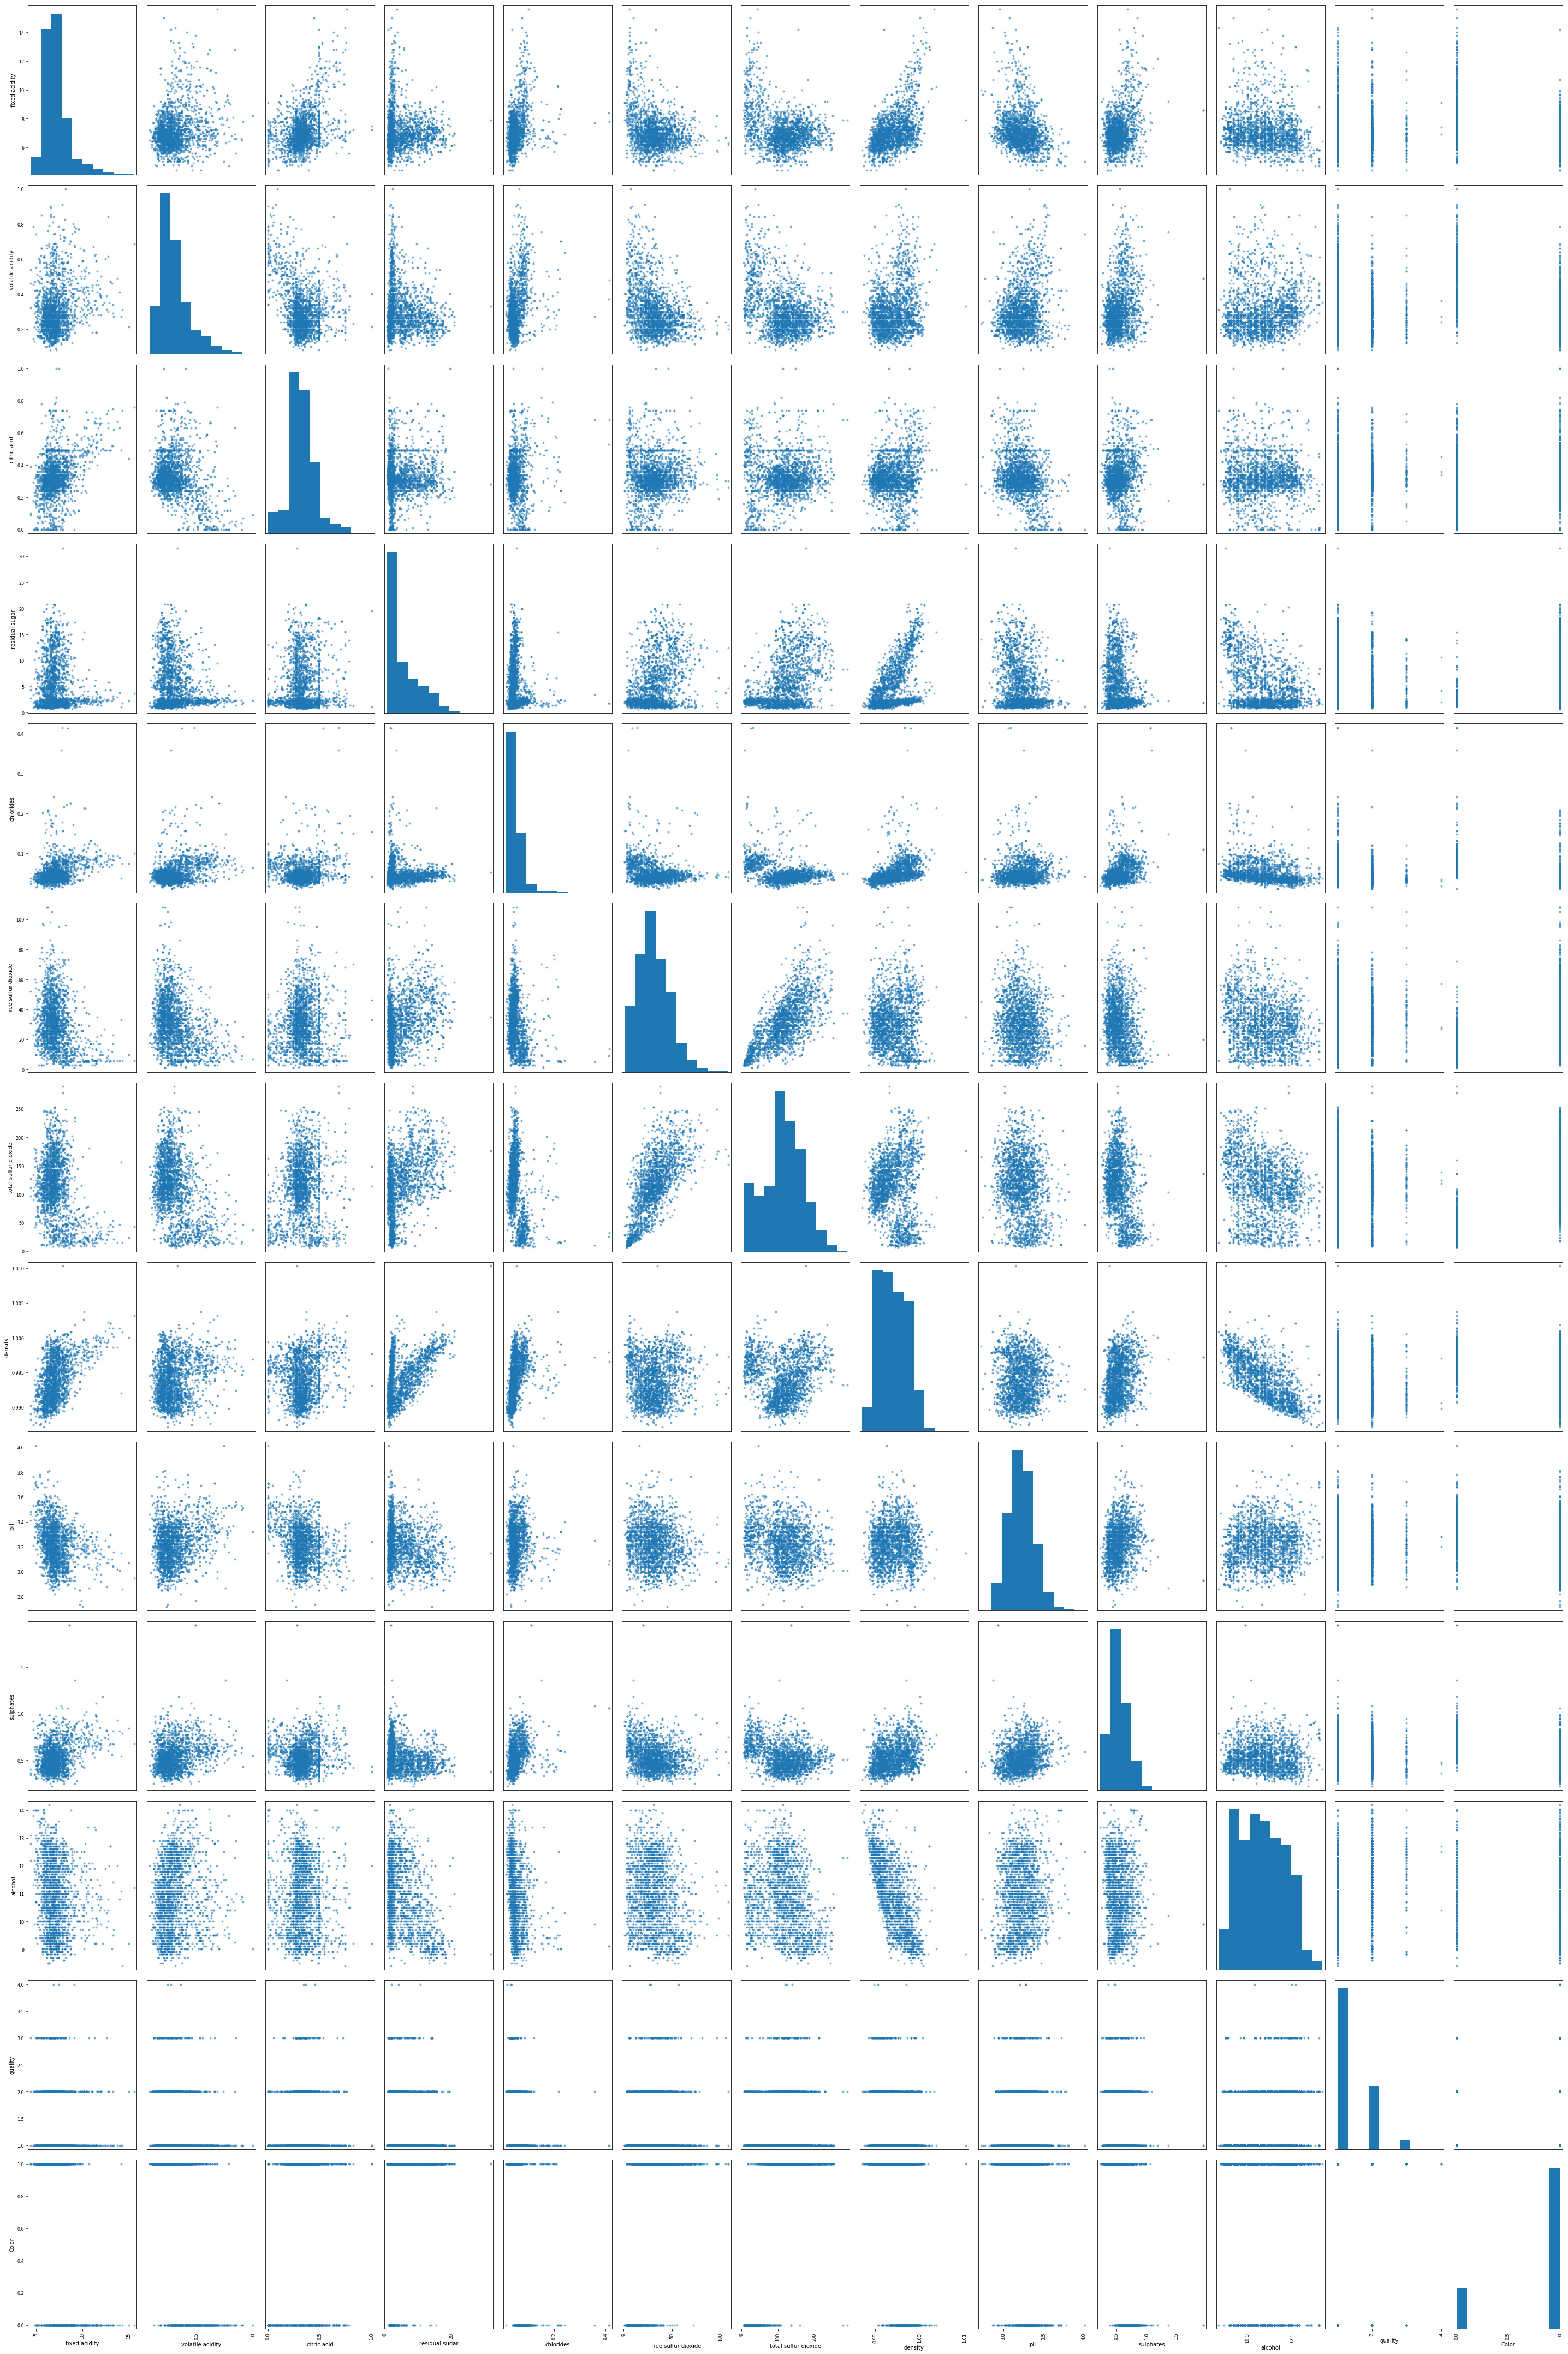

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
pd.tools.plotting.scatter_matrix(result_random,figsize=[40,60])
plt.tight_layout()
plt.show()

#Checking correlation between all variables

Plotting all variables in Scatter plot to get general feel of Correlation between variables

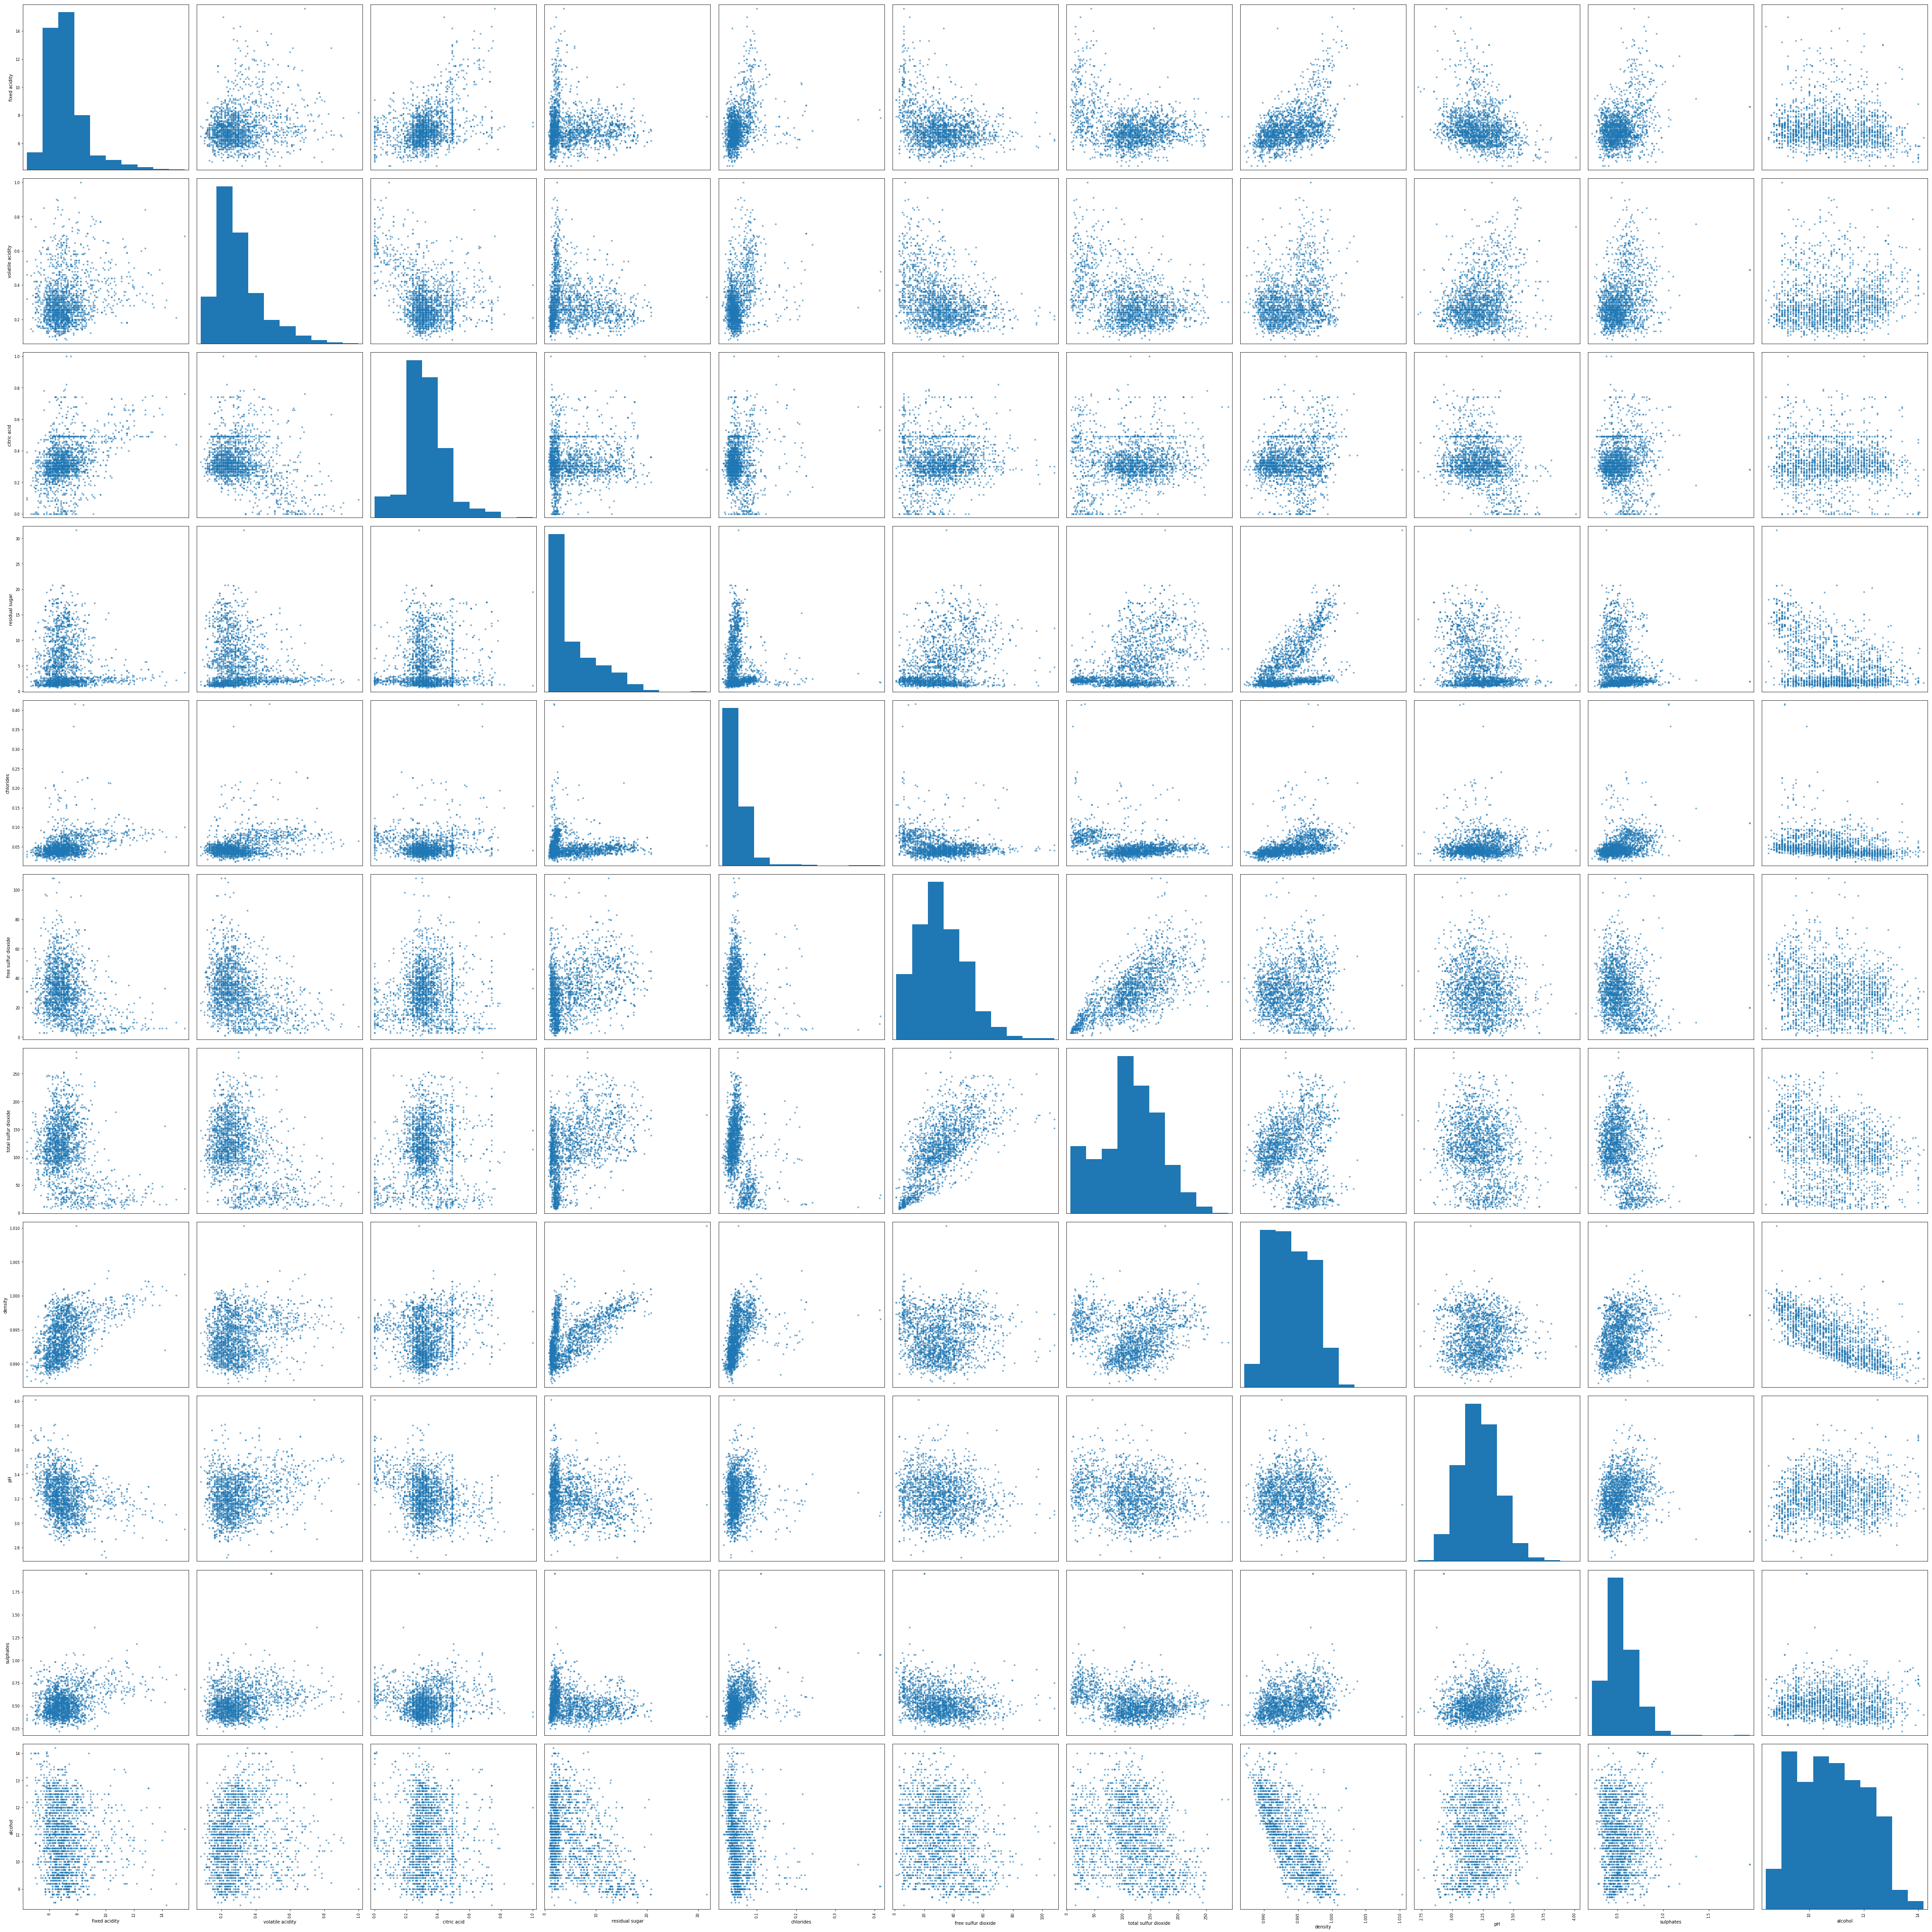

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
pd.tools.plotting.scatter_matrix(result_random.loc[:,"fixed acidity":"alcohol"],figsize=[60,60])
plt.tight_layout()
plt.show()

#Visualizing only relevant parameters ignoring non useful variables

Visualizing only relevant parameters using scatter plot

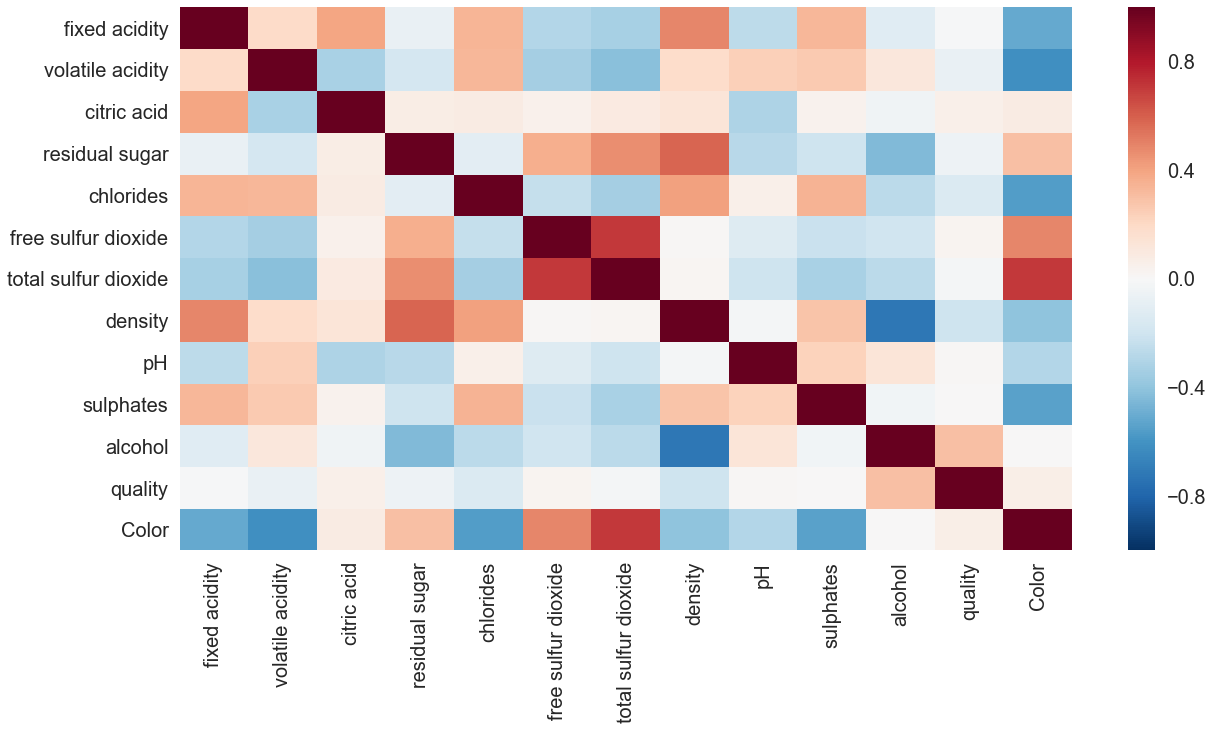

In [4]:
import seaborn as sns
sns.set_style("dark")
sns.set_context("poster")
result_random.apply(np.mean)
result_random.apply(np.std)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
corr_matrix = result_random.corr()
sns.heatmap(corr_matrix, vmax=1.).xaxis.tick_bottom()

#Using Seaborn's HeatMap to visualize the correlation between variables

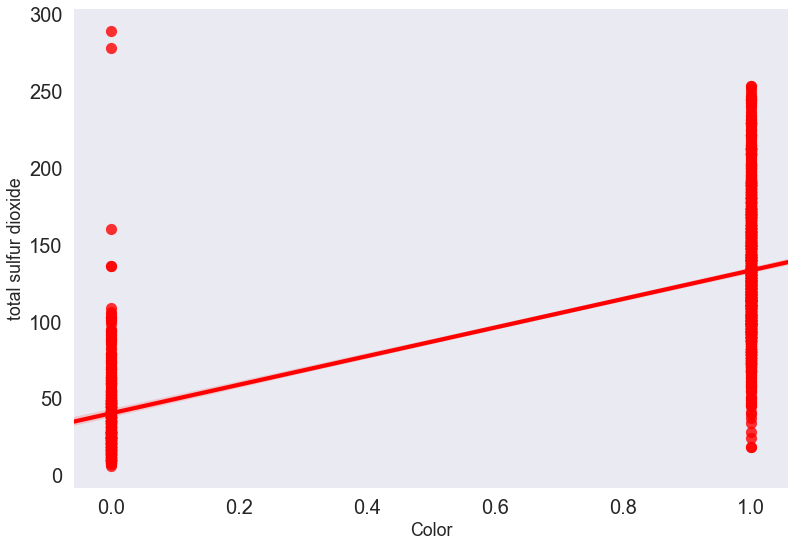

In [5]:
sns.regplot(x = 'Color', y = 'total sulfur dioxide', data = result_random, color = 'Red')
# Regression-plot Color vs Total Sulphur Dioxide clearly indicates Red wine has more stable level of Sulphur Dioxide over White wine

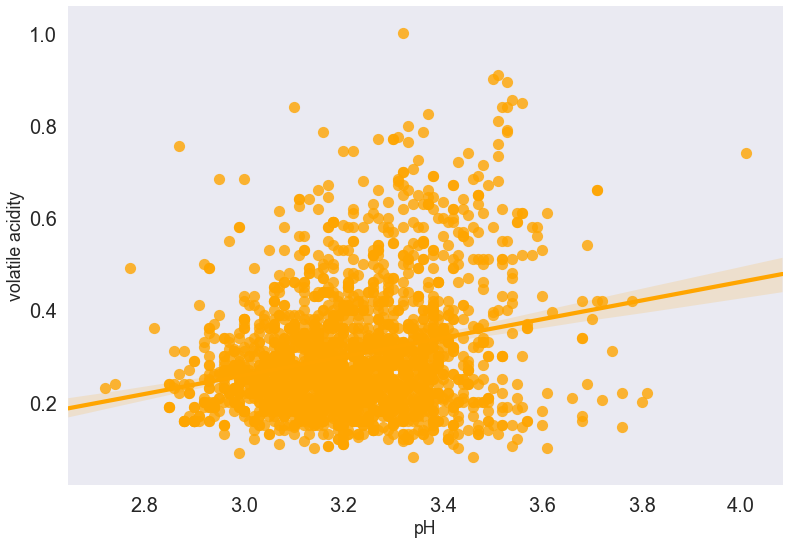

In [6]:
sns.regplot(x = 'pH', y = 'volatile acidity', data = result_random, color = 'Orange')
#Regression-plot pH vs Volatile Acidity, shows as the Volatile Acidity increases the pH increses but definitely not a clear trend

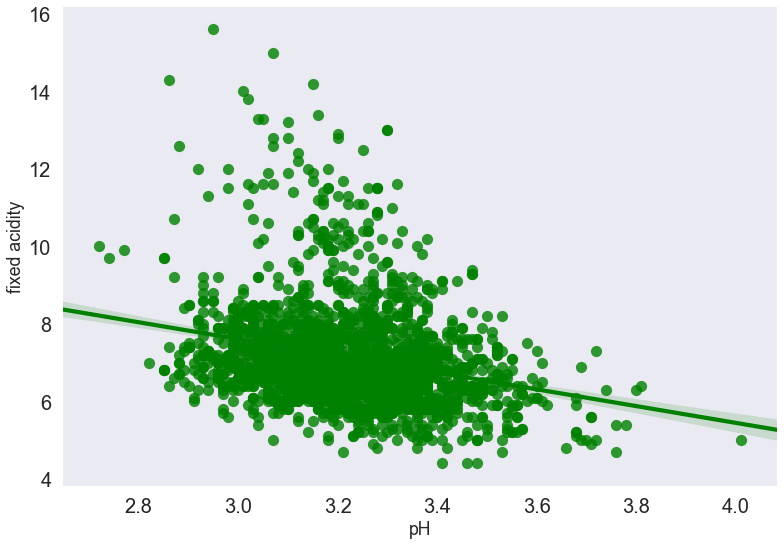

In [7]:
sns.regplot(x = 'pH', y = 'fixed acidity', data = result_random, color = 'Green')
#Compairing the earlier results with fixed acidity vs pH now, this is obvious that as the pH will increse the acidity will decrease

# Importing sklean to create the train/test datasets to prepare data for the Random Forest model

In [8]:
from sklearn.cross_validation import train_test_split

#Importing sklearn library for cross_validation and creating train/test split

y_quality = result_random.quality
y_color = result_random.Color

# Trying to build two different trees to predict Color & Quality of Wine

X_result_qlty = result_random.drop('quality',axis=1)
X_result_qlty.head()

#Dropping resultant variable quality from the train data

X_result_Col = result_random.drop('Color',axis=1)
X_result_Col.head()

#Dropping resultant variable Color from the train data

X_result_qlty__train, X_result_qlty__test, y_result_qlty__train, y_result_qlty__test = train_test_split(X_result_qlty, y_quality, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y_quality)

#Creating Test/Train Datasets using sklearn train_test_split function for Target as Quality

X_result_Col__train, X_result_Col__test, y_result_Col__train, y_result_Col__test = train_test_split(X_result_Col, y_color, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y_color)

#Creating Test/Train Datasets using sklearn train_test_split function for Target as Color

/Users/Radhika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Creating test,train data for 2 Random Forests<br>
    One Model will be used for predicting Quality of Wine<br>
    Another Model will be used to predict Red/White Wine

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_result_qlty__train)
scaler2 = preprocessing.StandardScaler().fit(X_result_Col__train)

X_train_scaled__qlty = scaler1.transform(X_result_qlty__train)
X_train_scaled__Col = scaler2.transform(X_result_Col__train)

#Scaling train data for both Color & Quality

X_test_scaled__qlty = scaler1.transform(X_result_qlty__test)
X_test_scaled__Col = scaler2.transform(X_result_Col__test)

#print (X_test_scaled__Col.mean(axis=0))
#print (X_test_scaled__Col.std(axis=0))
#print (X_test_scaled__qlty.mean(axis=0))
#print (X_test_scaled__qlty.std(axis=0))

#Checking for each scaled Color & qlty if the mean and std is alinged 

Creating scaled variables<br>
For Train & Test Datasets<br>
Verifying with mean & std, to ensure variables are scaled to run the model.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=20))
#print(pipeline.get_params())
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 10, 5, 3, 1]}

#providing parameters to use & creating a pipeline

Making pipelines & Introducing Hyperparameters for Random Forest modelling to utilize

In [11]:
from sklearn.model_selection import GridSearchCV

model_qlty = GridSearchCV(pipeline, hyperparameters, cv=10)
model_col = GridSearchCV(pipeline, hyperparameters, cv=10)
 
model_qlty.fit(X_train_scaled__qlty, y_result_qlty__train)
model_col.fit(X_train_scaled__Col, y_result_Col__train)

#print (model_col.best_params_)
#print (model_qlty.best_params_)
#print (model_col.refit,model_qlty.refit)

y_pred__qlty = model_qlty.predict(X_test_scaled__qlty)
y_pred__col = model_col.predict(X_test_scaled__Col)

#Using GridSearchCv to run the model, which cross-validates the feature-selection

Running the model & fitting on scaled variables 

In [12]:
print((r2_score(y_pred__qlty,y_result_qlty__test)))
print((r2_score(y_pred__col,y_result_Col__test)))

#Checking r2 for each model to verify the accuracy

-2.11057033675
0.931410090392


The Random Forest model works well for predicting Wine is Red/White<br>
However, for predicting the Quality of wine to correct cluster 1,2,3,4 ; Model Fails miserably

In [13]:
result_random_lean = result_random[['fixed acidity', 'volatile acidity', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality','Color']].copy()

Further reducing variables to keep only relevant variables to proceed.

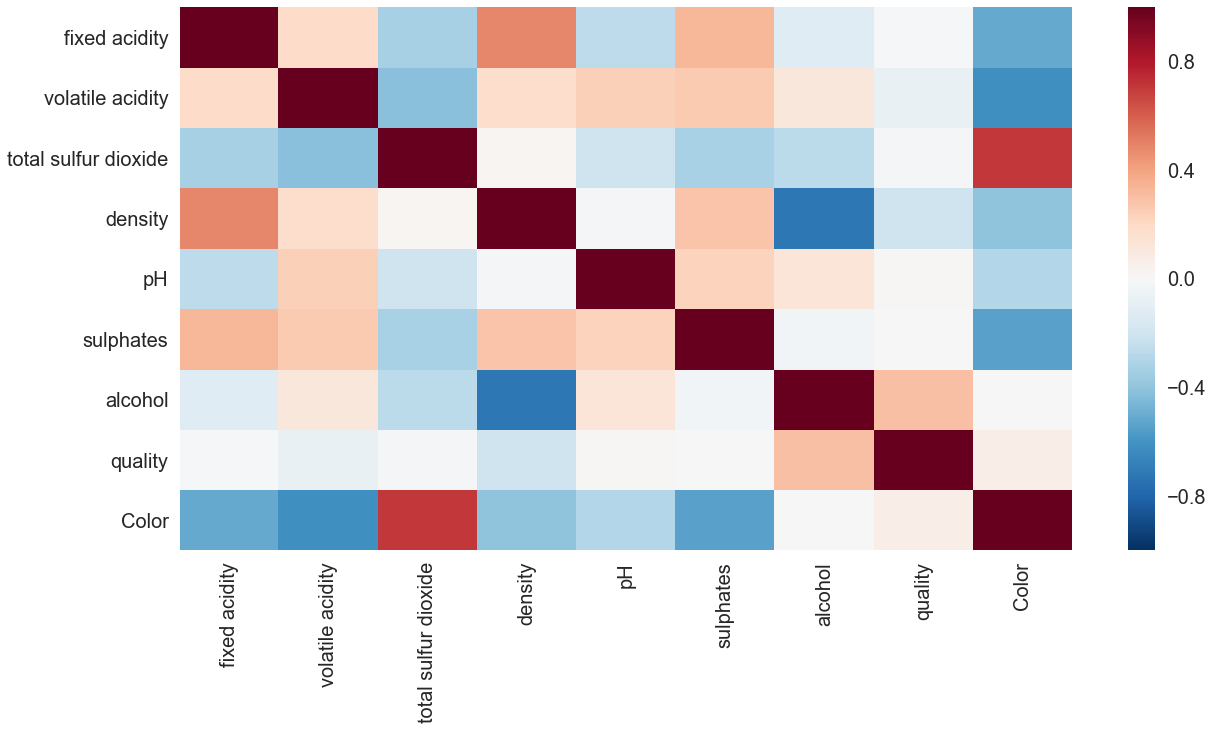

In [14]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
result_random_lean.apply(np.mean)
result_random_lean.apply(np.std)
corr_matrix = result_random_lean.corr()
sns.heatmap(corr_matrix, vmax=1.).xaxis.tick_bottom()

Visualizing data again to check correlation between remaining 9 variables

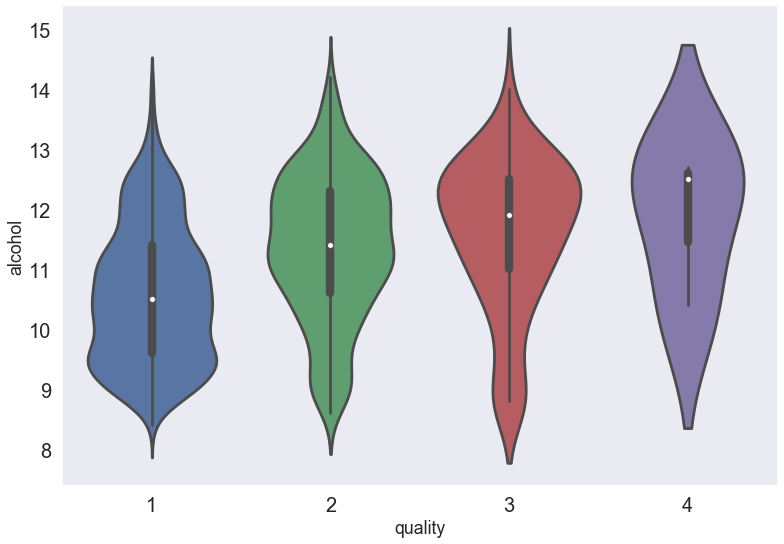

In [16]:
sns.violinplot('quality', 'alcohol', data=result_random_lean)
#Utilizing the violin plot to display that wine of better quality has higher & more stable alcohol content

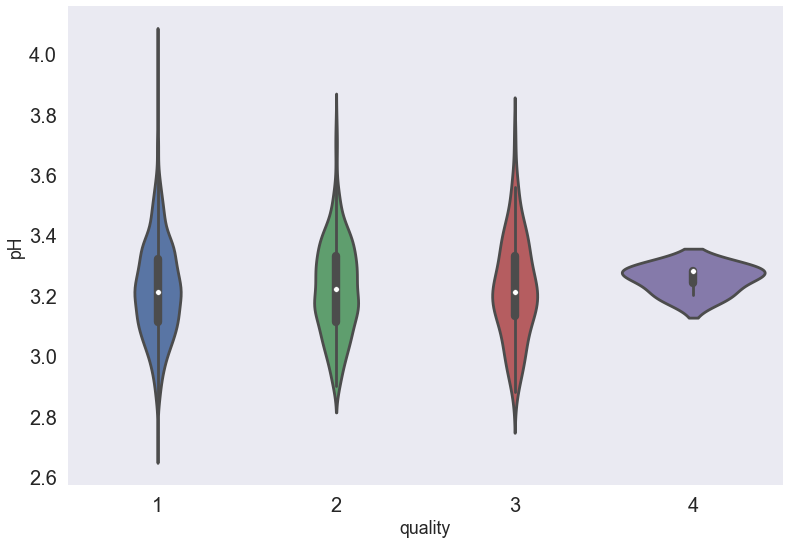

In [17]:
sns.violinplot('quality', 'pH', data=result_random_lean)
#Utilizing the violin plot to display that wine of better quality has more stable pH content

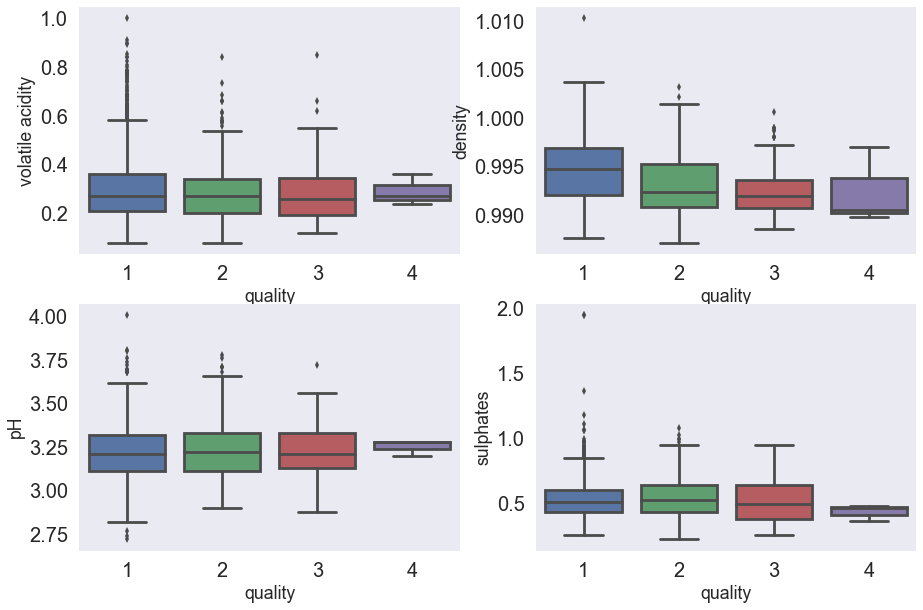

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot('quality', 'volatile acidity', data = result_random_lean, ax = ax[0, 0])
sns.boxplot('quality','density', data = result_random_lean, ax = ax[0, 1])
sns.boxplot('quality','pH', data = result_random_lean, ax = ax[1, 0])
sns.boxplot('quality','sulphates', data = result_random_lean, ax = ax[1, 1])

#Displaying various parameters vs Quality to find the interesting trend if any

We can see that the Wine of better quality has much stable values for all chemical components on an average

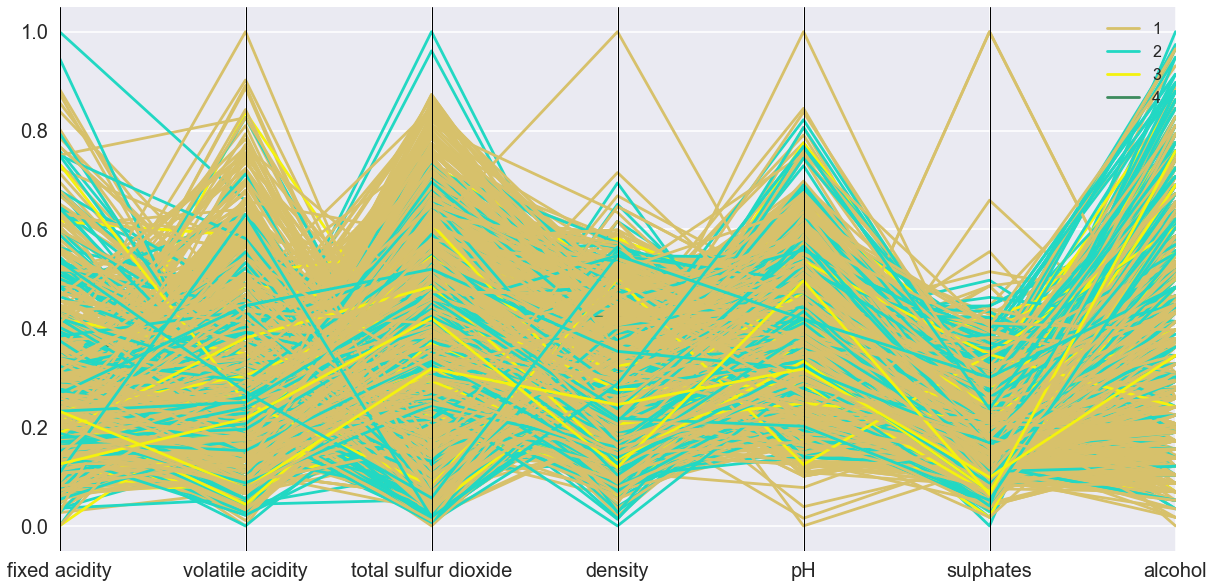

In [19]:
from pandas.tools.plotting import parallel_coordinates
import matplotlib.pylab as plt

#Importing Parallel coordinated plots to see if there is a general trend as indiated by visualizing parameters till now

plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
#print(result_random_lean)
Y = result_random_lean['quality']
X = result_random_lean.filter(['fixed acidity', 'volatile acidity', 'total sulfur dioxide','density','pH','sulphates','alcohol'], axis=1)

Features = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide','density','pH','sulphates','alcohol']

#Selecting parameters

X_norm = (X - X.min())/(X.max() - X.min())

data_norm = pd.concat([X_norm[Features], Y], axis=1)

#Normalizing data as we are plotting them against each other, so scaling is a important

parallel_coordinates(data_norm, 'quality')
plt.show()

Using the parallel co-ordinated plot technique to visualize the hidden trends in the data between all variables<br>
Plotting Quality of Wine from Y vs. other features of Wine via Normalized X<br>
Normalization of data ensures all variables to be scaled appropriately to each other<br>
We do notice trends as Quality 1 Wine is usually higher in Sulphur Dioxide & Lower in Alcohol content<br>
However nothing interesting can be found


In [20]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y,
     test_size=0.30, random_state=123)

Creating fresh test & train data from normalized parameters for LDA (Linear Discriminant Analysis) & Decision Trees implementation.

In [21]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2) 

from sklearn import metrics
lda_clf = LDA()
lda_clf.fit(X_train, Y_train)
LDA(n_components=None, priors=None)
pred_train_lda = lda_clf.predict(X_train)

print('Prediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_train, pred_train_lda)))

#Implementing LDA to predict on the train dataset, gives us an good accuracy
#Trying to predict with similar accuracy using RandomForest now

Prediction accuracy for the training dataset
68.95%


/Users/Radhika/anaconda3/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/Radhika/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Performing Linear Discriminant Analysis before implementing Decision Trees, this also serves as Cross-Validation step.<br>
The LDA gives a decent accuracy predicting Wine Quality with Training Data.

In [22]:
pred_test_lda = lda_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_test, pred_test_lda)))

#Implementing LDA to predict on the test dataset, gives us an a better accuracy

Prediction accuracy for the test dataset
70.74%


Predicting Accuracy of Wine quality on Test Data<br>
LDA on Test data improves the Accuray percentage, Thus, trying Decision Trees with the Normalized Data below.

# Ploting Tree Accuracy of Random Forest Model & Conclusion

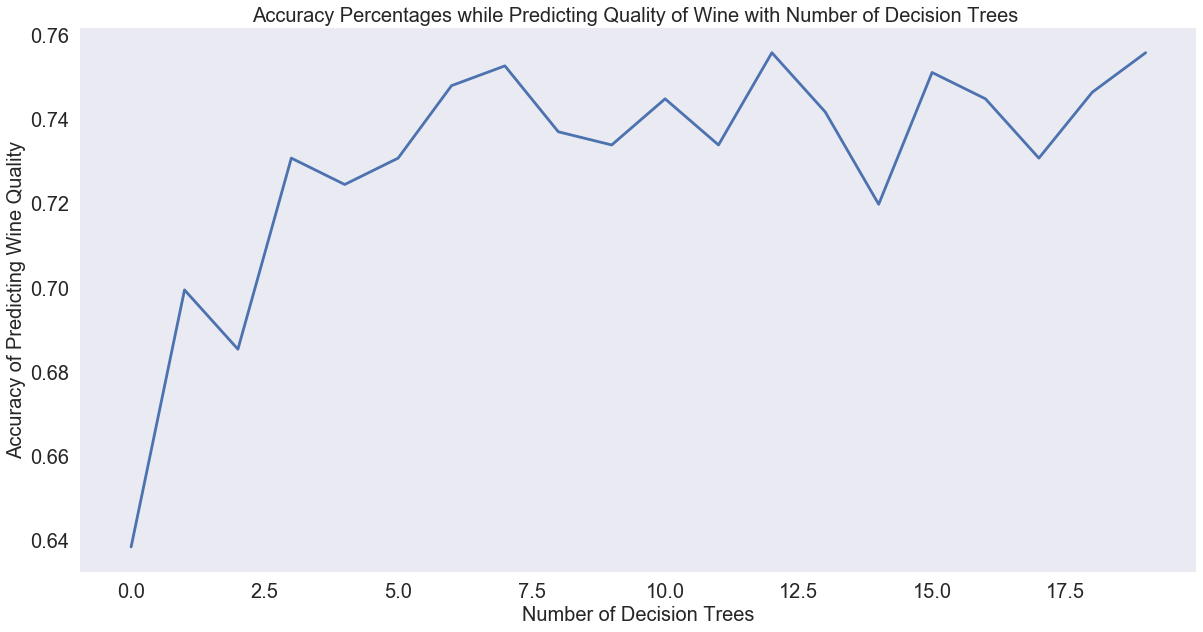

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics 
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

classifier=RandomForestClassifier(n_estimators=20)
classifier=classifier.fit(X_train,Y_train)

predictions=classifier.predict(X_test)

sklearn.metrics.confusion_matrix(Y_test,predictions)
sklearn.metrics.accuracy_score(Y_test, predictions)

model = ExtraTreesClassifier()
model.fit(X_train,Y_train)

#Tried with 100 trees but the accuracy does not increase by a huge margin after 20 trees, Hence encoding only 20 trees for final run

trees=range(20)
accuracy=np.zeros(20)

'''i_tree = 0
for tree_in_forest in classifier.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1
    '''
#above code generates trees in working directory, have attached them separately

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(X_train,Y_train)
   predictions=classifier.predict(X_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(Y_test, predictions)

plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.plot(trees, accuracy)
plt.title("Accuracy Percentages while Predicting Quality of Wine with Number of Decision Trees ",fontsize=20)
plt.xlabel("Number of Decision Trees",fontsize=20)
plt.ylabel("Accuracy of Predicting Wine Quality",fontsize=20)
plt.show()

Running Decision Trees Algorithm provides an Accuracy of 76% around 8th,19th Tree, though we ran it for 100 trees.<br>
It is obvious the Accuracy % does not increase beyond 20th Tree significantly.

In [30]:
from sklearn.tree import export_graphviz
from subprocess import check_call
check_call(['dot','-Tpng','tree_20.dot','-o','Tree_New_20.png'])
#Importing graphviz to create png file from dot file
#already created

0

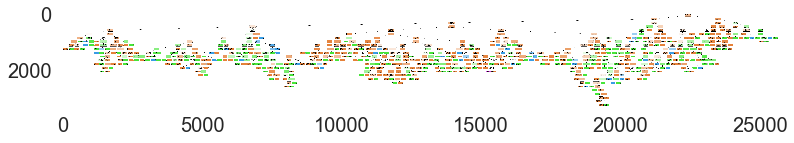

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Tree_New_20.png')
plt.imshow(img)
#Displaying tree using matplotlib however a better view is provided by http://www.webgraphviz.com by uploading data from dot file